# How does a Bike-share Navigate Speedy Success ?

Cycle bike-share is a company presented in Chicago. Their business is oriented on the location of bikes to individuals.

The company wants to design a new marketing strategy to convert casual riders into annual members.

Before doing anything, we should first set the main question which will be the problem to solve :

- How to convert casual riders into annual members ?

To answer it, we should first ask ourself :

- How different are casual riders from annual members ?
- What will make a casual riders buy Cyclistic annual memberships ?
- How can Cyclistic use digital media to influence casual riders to become members ?

To guide us in our analysis, we will use 12 months data collected by our company. The data goes **from 04-2020 to 06-2021.**

## 1. Load and merge datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = ['202005-divvy-tripdata.csv','202006-divvy-tripdata.csv','202007-divvy-tripdata.csv'
          ,'202008-divvy-tripdata.csv','202009-divvy-tripdata.csv','202010-divvy-tripdata.csv','202011-divvy-tripdata.csv',
         '202012-divvy-tripdata.csv','202101-divvy-tripdata.csv','202102-divvy-tripdata.csv','202103-divvy-tripdata.csv',
         '202104-divvy-tripdata.csv','202105-divvy-tripdata.csv','202106-divvy-tripdata.csv']

In [3]:
df = pd.read_csv('Q:/Google Data Analytics/case study 1/202004-divvy-tripdata.csv')

path = 'Q:/Google Data Analytics/case study 1/'

for i in file:
  df = pd.concat((df,pd.read_csv(f"{path}{i}")))

## 2. Cleaning

- format data and types
- Combine columns
- Correct errors (spelling mistakes, clipping, NaN,...)

In [4]:
df1 = df.copy()
df1.reset_index(inplace=True,drop=True)

In [5]:
df1.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [6]:
df1.shape #initial dimensions

(5088206, 13)

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.shape #dimensions after dropna

(4652670, 13)

### 2.1 Format data and types

In [9]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [10]:
df1.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [11]:
df1['member_casual'].replace({'casu' : 'casual'},inplace=True)
df1.drop(columns=['start_lat','start_lng','end_lat','end_lng'],inplace=True)

In [12]:
for col in df1.columns:
    print(col, " : ", np.sort(df1[col].unique()), "\n")

ride_id  :  ['000001004784CD35' '000002EBE159AE82' '00000550C665101A' ...
 'FFFFFBF105061B9E' 'FFFFFC1045B11550' 'FFFFFF0C829D3E7A'] 

rideable_type  :  ['classic_bike' 'docked_bike' 'electric_bike'] 

started_at  :  ['2020-04-01 00:00:30' '2020-04-01 00:02:35' '2020-04-01 00:02:41' ...
 '2021-06-30 23:59:26' '2021-06-30 23:59:35' '2021-06-30 23:59:59'] 

ended_at  :  ['2020-04-01 00:10:45' '2020-04-01 00:11:51' '2020-04-01 00:14:01' ...
 '2021-07-13 14:15:14' '2021-07-13 19:46:51' '2021-07-13 22:51:35'] 

start_station_name  :  ['2112 W Peterson Ave' '63rd St Beach' '900 W Harrison St'
 'Aberdeen St & Jackson Blvd' 'Aberdeen St & Monroe St'
 'Aberdeen St & Randolph St' 'Ada St & 113th St'
 'Ada St & Washington Blvd' 'Adler Planetarium' 'Albany Ave & 26th St'
 'Albany Ave & Bloomingdale Ave' 'Albany Ave & Montrose Ave'
 'Altgeld Gardens' 'Archer (Damen) Ave & 37th St'
 'Artesian Ave & Hubbard St' 'Ashland Ave & 13th St'
 'Ashland Ave & 50th St' 'Ashland Ave & 63rd St' 'Ashland Ave & 66

TypeError: '<' not supported between instances of 'str' and 'float'

In [13]:
data_types = {
    'ride_id' : 'string',
    'rideable_type' : 'string',
    'start_station_name' : 'string',
    'start_station_id' : 'string',
    'end_station_name' : 'string',
    'end_station_id' : 'string',
    'member_casual' : 'string'

}

In [14]:
df1 = df1.astype(data_types)

In [15]:
df1['started_at'] = pd.to_datetime(df1['started_at'])
df1['ended_at'] = pd.to_datetime(df1['ended_at'])

In [16]:
df1.dtypes

ride_id                       string
rideable_type                 string
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            string
start_station_id              string
end_station_name              string
end_station_id                string
member_casual                 string
dtype: object

In [17]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,casual


### 2.2 Combine columns

In [18]:
df1['time'] = df1['ended_at'] - df1['started_at']

### 2.3 Delete negative values

In [19]:
df1 = df1[df1['time'] >= pd.to_timedelta(0)]

### 2.4 Correct spelling mistakes

In [20]:
start_station = np.sort(df1['start_station_name'].unique())
end_station = np.sort(df1['end_station_name'].unique())

In [21]:
end_station = end_station.reshape(-1,1)

In [22]:
df1.replace({'Burling St (Halsted) & Diversey Pkwy (Temp)' : 'Burling St & Diversey Pkwy',
            'Damen Ave & Walnut (Lake) St (*)' : 'Damen Ave & Walnut (Lake) St',
             'Leavitt St & Division St (*)' : 'Leavitt St & Division St',
            'Leavitt St & Belmont Ave (*)' : 'Leavitt St & Belmont Ave',
            'Racine Ave & Washington Blvd (*)' : 'Racine Ave & Washington Blvd',
            'Stewart Ave & 63rd St (*)' : 'Stewart Ave & 63rd St',
            'Throop (Loomis) St & Taylor St' : 'Throop St & Taylor St',
            'Wentworth Ave & Cermak Rd (Temp)' : 'Wentworth Ave & Cermak Rd',
            'Western Ave & Fillmore St (*)' : 'Western Ave & Fillmore St',
            'Wood St & Chicago Ave (*)' : 'Wood St & Chicago Ave',
            'Wood St & Taylor St (Temp)' : 'Wood St & Taylor St',
            'Burling St (Halsted) & Diversey Pkwy (Temp)' : 'Burling St & Diversey Pkwy',
            'Smith Park (*)' : 'Smith Park',
            'Wentworth Ave & 24th St (Temp)' : 'Wentworth Ave & 104th St'},inplace=True)

### 3. Analyze

In [23]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,member,0 days 00:26:49
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,member,0 days 00:08:09
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,member,0 days 00:14:23
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,member,0 days 00:12:12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,casual,0 days 00:52:55


### 3.1 Compute mean for member and casual

In [59]:
time_to_int = df1['time'].astype('int64')
new_df = pd.concat((df1['member_casual'],time_to_int),axis=1)
time = new_df.groupby('member_casual').mean()
time[['time']] = pd.to_timedelta(time['time'])
time

,time
member_casual,
casual,0 days 00:43:20.035629337
member,0 days 00:15:28.498929978


Casual rides for longer time than member

### 3.2 Number of rides per day

In [24]:
df1['start_day'] = df1['started_at'].dt.strftime('%A')

Text(0, 0.5, 'Number of rides')

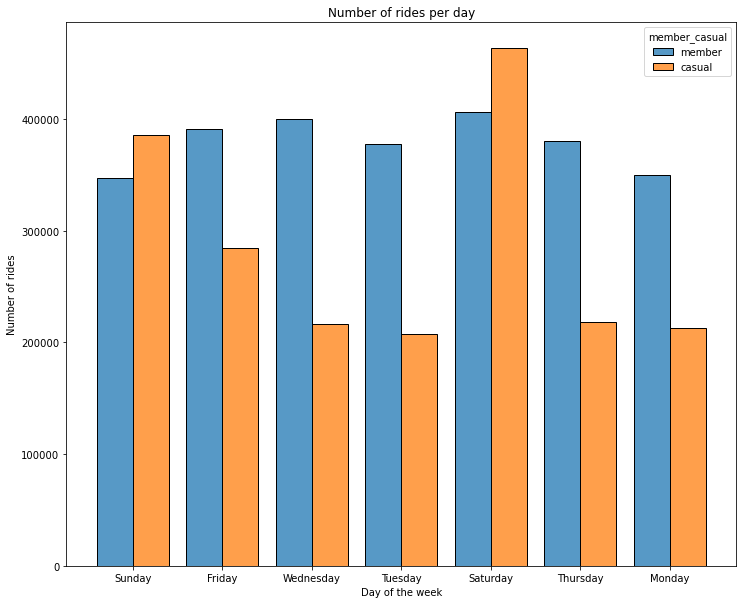

In [26]:
plt.figure(figsize=(12,10))
sns.histplot(x=df1['start_day'],data=df1,hue='member_casual', multiple="dodge", shrink=.8)
plt.title('Number of rides per day')
plt.xlabel('Day of the week')
plt.ylabel('Number of rides')

Saturday and sunday are the most common day for riding

### 3.3 Number of rides per datetime

In [64]:
df1['start_day_int'] = df1['start_day'].astype('category').cat.codes

Text(0, 0.5, 'Number of rides')

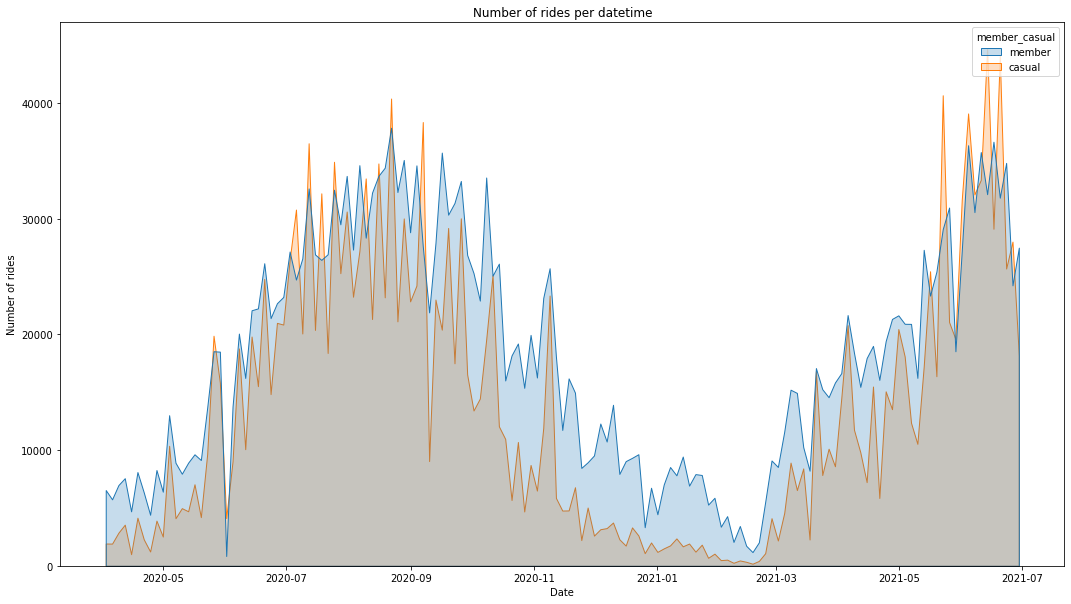

In [66]:
plt.figure(figsize=(18,10))
sns.histplot(x=df1['started_at'],data=df1,hue='member_casual',element="poly")
plt.title('Number of rides per datetime')
plt.xlabel('Date')
plt.ylabel('Number of rides')

July and August are the most common biking period for casuals and members

### 3.4 Most frequent starting point

C:\Users\kesig\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of rides')

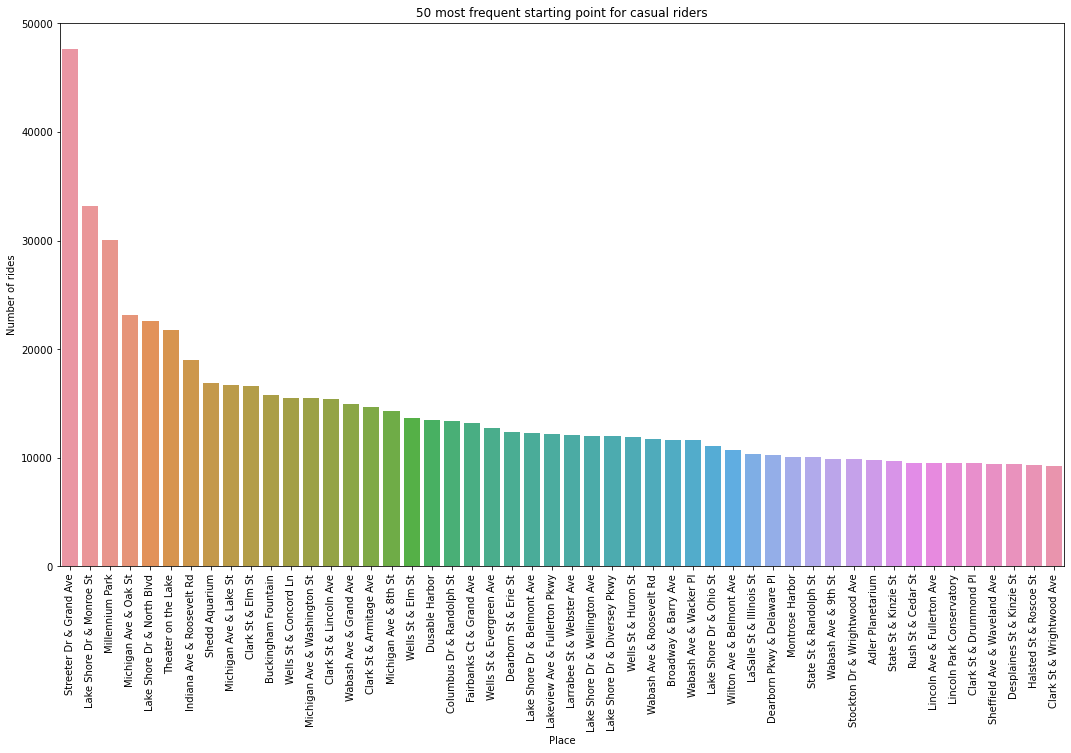

In [79]:
plt.figure(figsize=(18,10))
casuals = df1[df1['member_casual'] == 'casual']
most_freq_start_casuals = casuals['start_station_name'].value_counts()[:50]
sns.barplot(most_freq_start_casuals.index,most_freq_start_casuals.values)
plt.title('50 most frequent starting point for casual riders')
plt.xlabel('Place')
plt.xticks(rotation=90)
plt.ylabel('Number of rides')

C:\Users\kesig\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of rides')

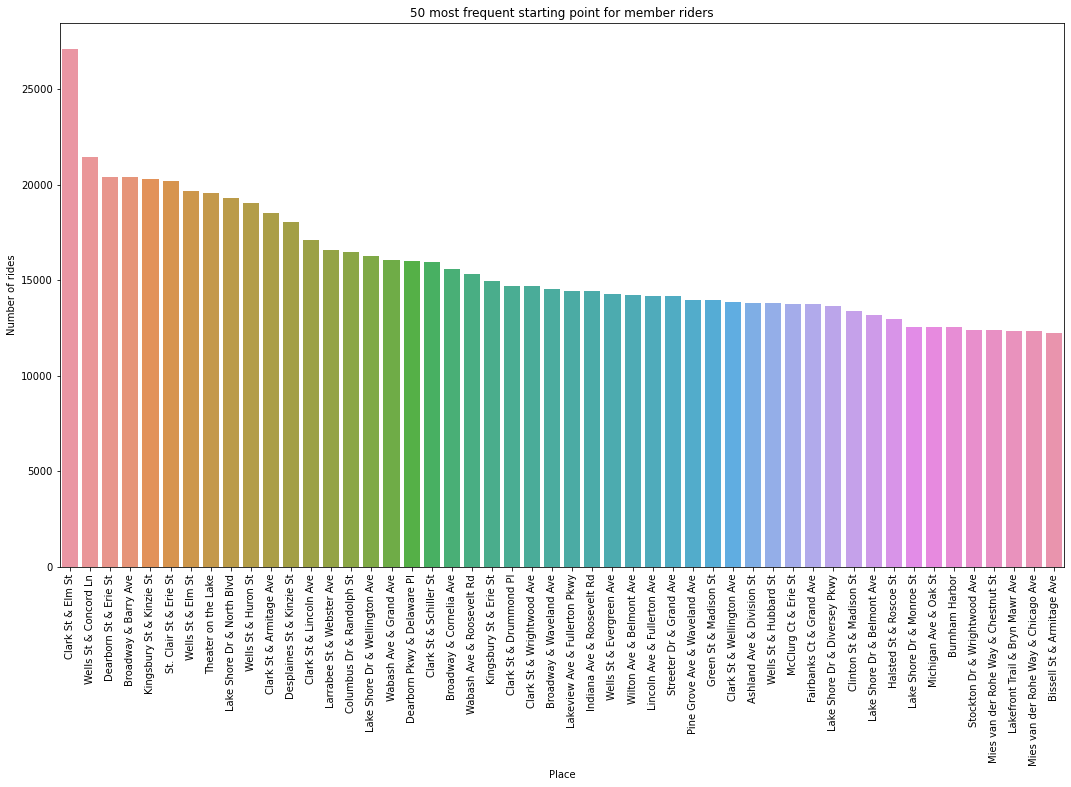

In [80]:
plt.figure(figsize=(18,10))
members = df1[df1['member_casual'] == 'member']
most_freq_start_members = members['start_station_name'].value_counts()[:50]
sns.barplot(most_freq_start_members.index,most_freq_start_members.values)
plt.title('50 most frequent starting point for member riders')
plt.xlabel('Place')
plt.xticks(rotation=90)
plt.ylabel('Number of rides')

### 3.5 Most frequent ending point

C:\Users\kesig\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of rides')

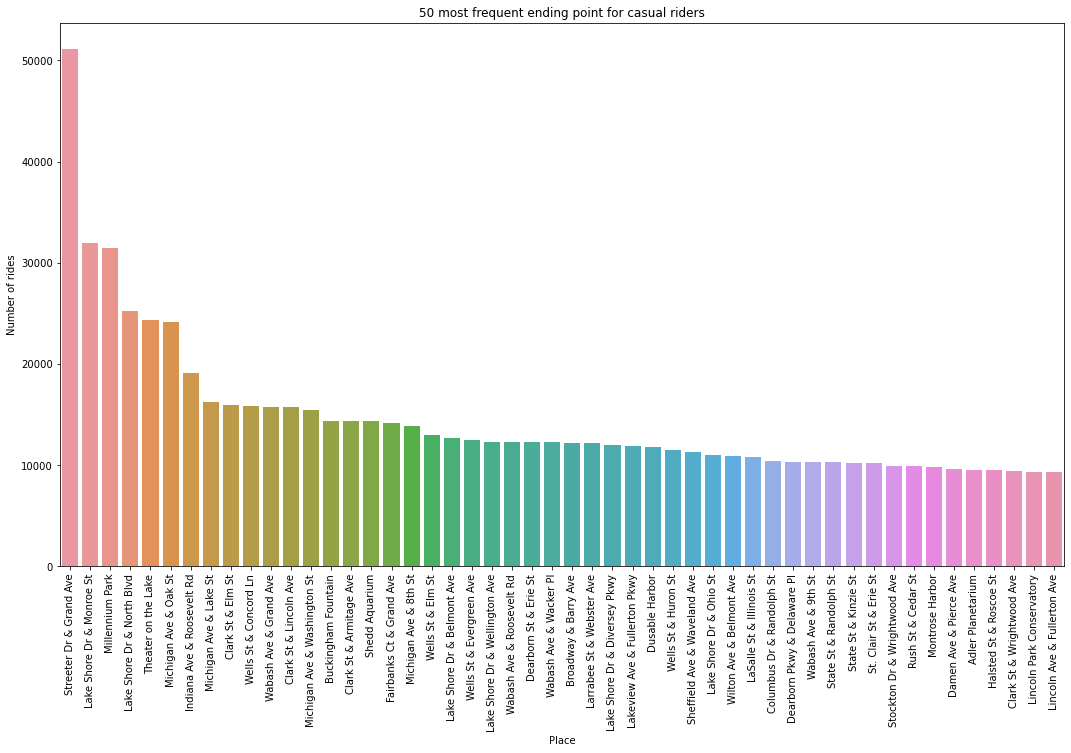

In [81]:
plt.figure(figsize=(18,10))
casuals = df1[df1['member_casual'] == 'casual']
most_freq_end_casuals = casuals['end_station_name'].value_counts()[:50]
sns.barplot(most_freq_end_casuals.index,most_freq_end_casuals.values)
plt.title('50 most frequent ending point for casual riders')
plt.xlabel('Place')
plt.xticks(rotation=90)
plt.ylabel('Number of rides')

C:\Users\kesig\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of rides')

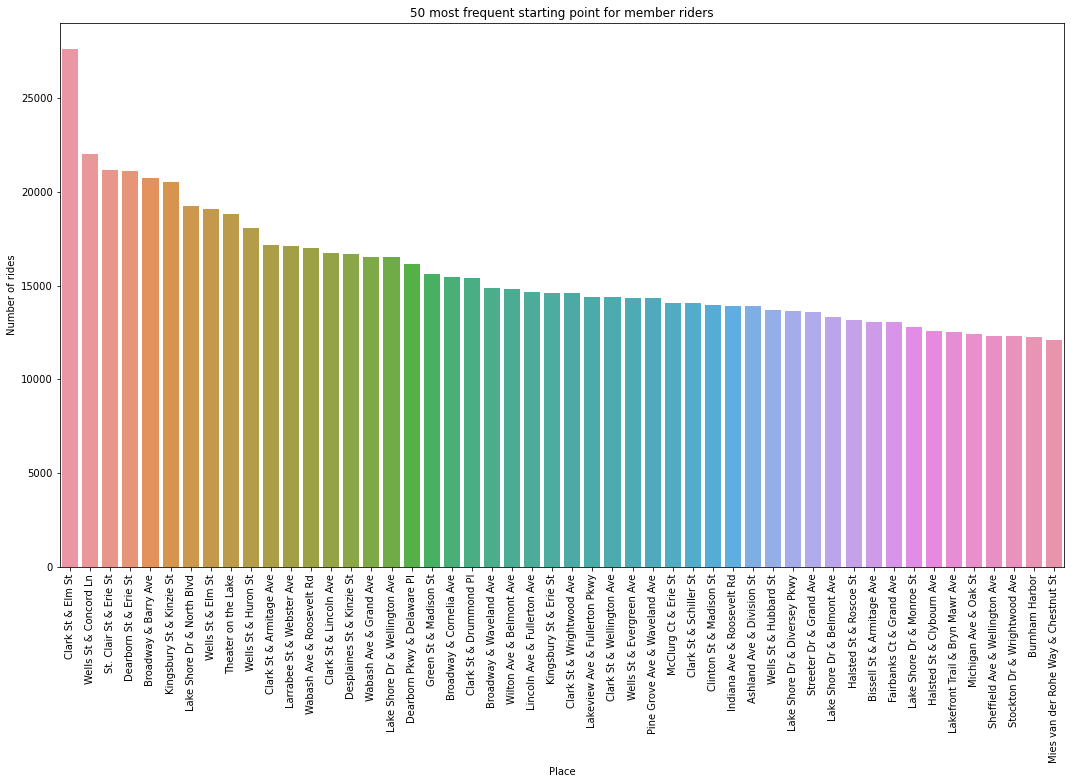

In [83]:
plt.figure(figsize=(18,10))
members = df1[df1['member_casual'] == 'member']
most_freq_end_members = members['end_station_name'].value_counts()[:50]
sns.barplot(most_freq_end_members.index,most_freq_end_members.values)
plt.title('50 most frequent starting point for member riders')
plt.xlabel('Place')
plt.xticks(rotation=90)
plt.ylabel('Number of rides')

# Summary

- Casuals bike for longer time than members (46 minutes against 16minutes).
- The most frequent days for biking are saturday and sunday.
- The least frequent days are weekdays.
- Individuals ride most between July and August. It is mostly related to the weather. Summer season is preferred.
- Members riders mostly for work or school because their biking duration is mostly constant.

# Advices

- Make a marketing campaign, like biking promotion, on the weekend. On different prices. It could help them to move toward memebership.
- Make promotion on the least period, not in Summer (peak values).
- Making a campaign on the most frequent starting or ending points could help to convert more casuals to membership.